Imort from Library

In [60]:
import pandas as pd   #panda used for data analysis and load CSV file
import numpy as np  #work with array and perform mathematic function
import matplotlib.pyplot as plt  # to make chart, histogram ..
import seaborn as sns #make complex to easier, creat boxplot, violin plots
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df_org = pd.read_csv('/content/drive/MyDrive/Covid Data.csv') #load data
df= df_org.copy()

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [63]:
df


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [64]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [65]:
df.describe()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [66]:
print("-"*50)
print("1. MISSING VALUES CHECK (df.isnull().sum())")
print("-"*50)
missing_values = df.isnull().sum()#checking null value
print(missing_values)

--------------------------------------------------
1. MISSING VALUES CHECK (df.isnull().sum())
--------------------------------------------------
USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [67]:
df.duplicated().sum()#checking dulicate value

np.int64(812049)

In [68]:
print("\n" + "="*50)#making Output beautiful
print("2. DUPLICATE RECORDS CHECK")
print("="*50) #making Output beautiful
duplicates = df.duplicated().sum()
print(f"Found {duplicates} duplicate rows")

if duplicates > 0:
    print("\nSample duplicate rows:") # Display sample duplicates before removal
    print(df[df.duplicated(keep=False)].head())
    # df.duplicated(keep=False): This identifies all duplicated rows in the DataFrame df.
    df.drop_duplicates(inplace=True)# Remove duplicates
    print(f"\nRemoved {duplicates} duplicates. New shape: {df.shape}")
else:
    print("No duplicates found!")


2. DUPLICATE RECORDS CHECK
Found 812049 duplicate rows

Sample duplicate rows:
    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
6       2             1    1             1  9999-99-99       97          2   
19      2             1    1             1  9999-99-99       97          2   
22      2             1    2             1  9999-99-99       97          2   
35      2             1    2             1  9999-99-99       97          2   
49      2             1    1             1  9999-99-99       97          2   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
6    64         2         2  ...       2        2             2   
19   64         2         2  ...       2        2             2   
22   45        97         2  ...       2        2             2   
35   45        97         2  ...       2        2             2   
49   30         2         2  ...       2        2             2   

    OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENA

In [69]:
df.duplicated().sum() #check again

np.int64(0)

Verify data type
|


In [70]:
print("-"*50)
print("3. DATA TYPE VERIFICATION")
print("-"*50)
print("Current data types:")
print(df.dtypes)

--------------------------------------------------
3. DATA TYPE VERIFICATION
--------------------------------------------------
Current data types:
USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object


In [71]:
#concerting date time
import pandas as pd
import datetime# though this import isn't needed for pd.to_datetime()
print(df.head())# check if df is defined first
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')# then convert DATE_DIED column to datetime

print(df.dtypes)
print(df['DATE_DIED'].head())

   USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO

Visualization

----------------------------------------------------------------------------------------------------
1. UNIVARIATE ANALYSIS (Distribution of Single Variables)
----------------------------------------------------------------------------------------------------


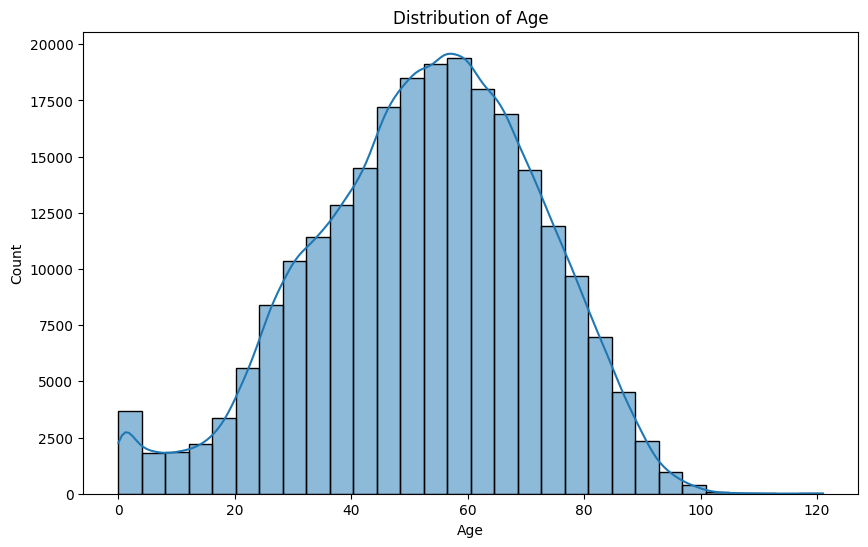

In [72]:
print("-"*100)
print("1. UNIVARIATE ANALYSIS (Distribution of Single Variables)")
print("-"*100)

# Histogram for salary distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='AGE', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()





Bivariate Analysis

<ipython-input-73-2313734330>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PATIENT_TYPE', y='AGE', order=order, palette='Set2')


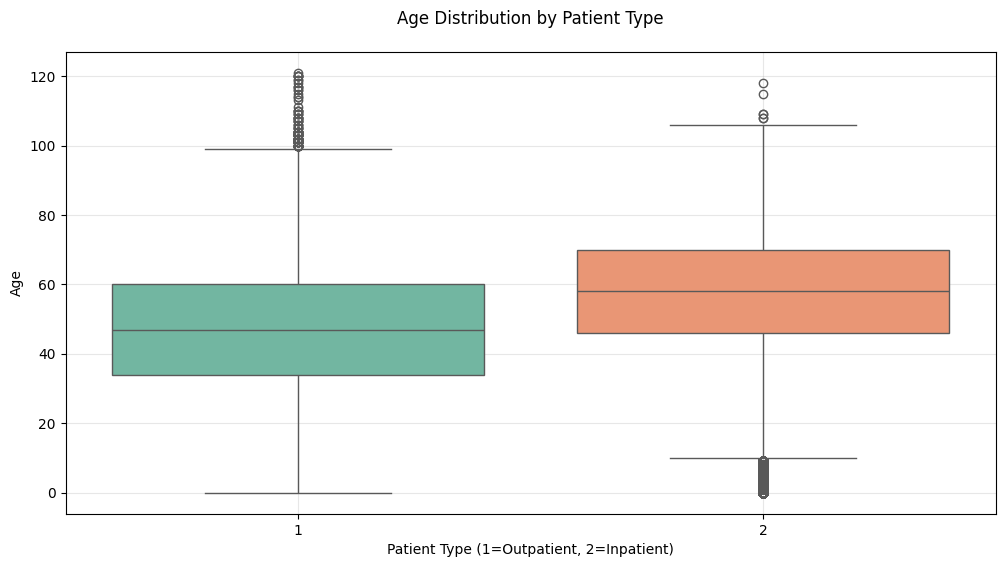

In [73]:
plt.figure(figsize=(12, 6))
# Define order for Patient type
order = [1, 2]
# Create the boxplot: Age vs Patient type
sns.boxplot(data=df, x='PATIENT_TYPE', y='AGE', order=order, palette='Set2')

# Add title and labels
plt.title('Age Distribution by Patient Type', pad=20)
plt.xlabel('Patient Type (1=Outpatient, 2=Inpatient)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)
plt.show()


<ipython-input-74-3055522864>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ICU', y='AGE', order=order, palette='Set2')


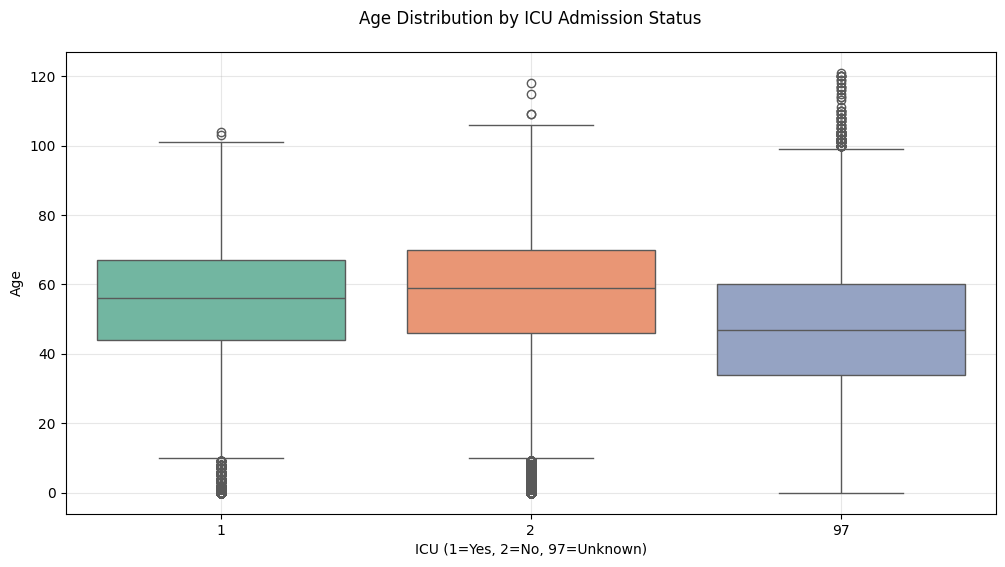

In [74]:
plt.figure(figsize=(12, 6))

# Define order for ICU variable: 1 (Yes), 2 (No), 97 (Unknown)
order = [1, 2, 97]

# Create the boxplot: Age vs ICU
sns.boxplot(data=df, x='ICU', y='AGE', order=order, palette='Set2')

# Add title and labels
plt.title('Age Distribution by ICU Admission Status', pad=20)
plt.xlabel('ICU (1=Yes, 2=No, 97=Unknown)')
plt.ylabel('Age')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

 Correlation Analysis

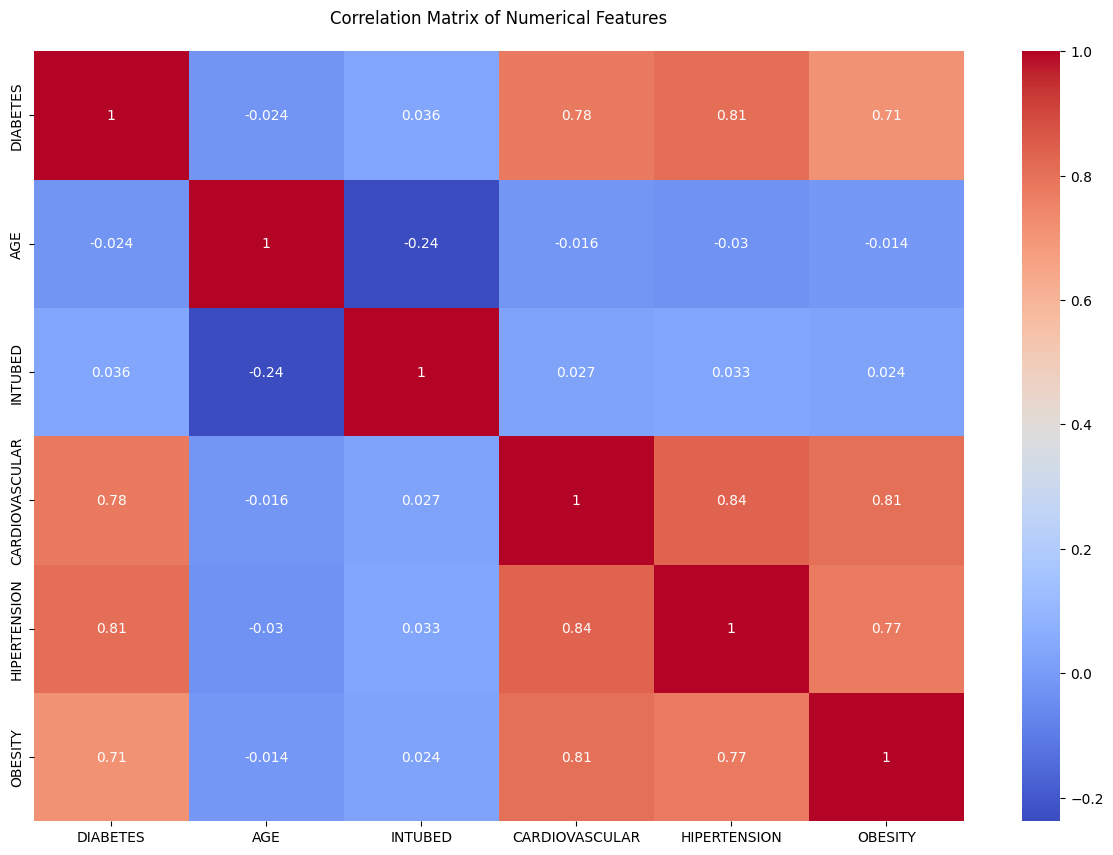

In [75]:
plt.figure(figsize=(15, 10))
problem=['DIABETES','AGE', 'INTUBED', 'CARDIOVASCULAR', 'HIPERTENSION','OBESITY']
corr=df[problem].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', pad=20)
plt.show()

outlier

Found 37 outlier ages


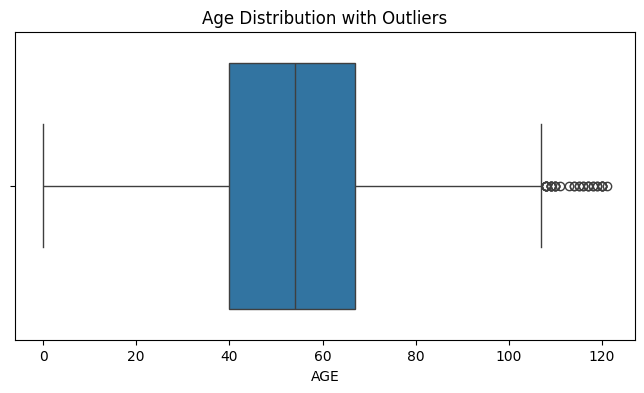

In [76]:
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['AGE'] < lower_bound) | (df['AGE'] > upper_bound)]
print(f"Found {len(outliers)} outlier ages")
plt.figure(figsize=(8,4))
sns.boxplot(x=df['AGE'])
plt.title('Age Distribution with Outliers')
plt.show()

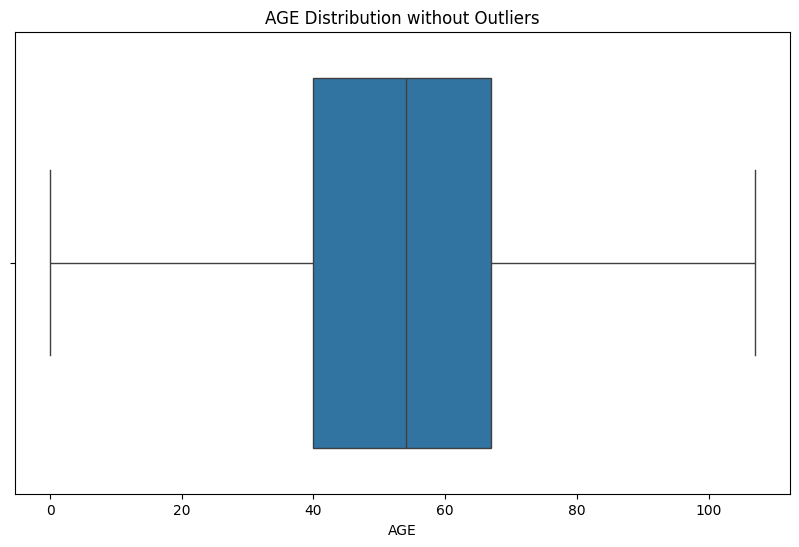

In [78]:
#handling Outlier
df = df[(df['AGE'] >= lower_bound) & (df['AGE'] <= upper_bound)]
plt.figure(figsize=(10,6))
sns.boxplot(x=df['AGE'])
plt.title('AGE Distribution without Outliers')
plt.show()

In [79]:
#modeling
#train test split
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.2, random_state=42)
print("X_train size:",len(X_train))
print("X_test size:",len(X_test))

X_train size: 189191
X_test size: 47298


In [80]:
#creating a model

model1 = LinearRegression()
model1.fit(X_train, y1_train)
y1_pred = model1.predict(X_test)
model2 = LinearRegression()
model2.fit(X_train, y2_train)
y2_pred = model2.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE correctly
mse_age = mean_squared_error(y1_test, y1_pred)
mse_icu = mean_squared_error(y2_test, y2_pred)
avg_mse = (mse_age + mse_icu) / 2

print(f"MSE for AGE: {mse_age:.4f}")
print(f"MSE for ICU: {mse_icu:.4f}")
print(f"Average MSE before tuning: {avg_mse:.4f}")

print("\n")

# Calculate R² correctly
r2_age = r2_score(y1_test, y1_pred)
r2_icu = r2_score(y2_test, y2_pred)
avg_r2 = (r2_age + r2_icu) / 2

print(f"R² for AGE: {r2_age:.4f}")
print(f"R² for ICU: {r2_icu:.4f}")
print(f"Average R² before tuning: {avg_r2:.4f}")


MSE for AGE: 0.0000
MSE for ICU: 0.0000
Average MSE before tuning: 0.0000


R² for AGE: 1.0000
R² for ICU: 1.0000
Average R² before tuning: 1.0000


debug step

In [82]:
print("AGE Predictions:", y1_pred[:5])
print("AGE True:", y1_test[:5].values)

print("ICU Predictions:", y2_pred[:5])
print("ICU True:", y2_test[:5].values)


AGE Predictions: [-1.63575446e-14  8.90000000e+01  5.10000000e+01  3.90000000e+01
  5.40000000e+01]
AGE True: [ 0 89 51 39 54]
ICU Predictions: [99.  2. 97. 97. 97.]
ICU True: [99  2 97 97 97]


#using hyperparameter tuning

setting up parameters

In [ ]:
params={'alpha':[0.1,1.0,10.0,100.0]}

In [ ]:
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

creating high fever flag